In [47]:
## -- IMPORTS --
import torch
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from sklearn.model_selection import train_test_split

In [39]:
# load and clean paths
train_df = pd.read_csv("train_images.csv")

train_df["image_path"] = train_df["image_path"].str.lstrip("/")
train_df["image_path"] = train_df["image_path"].apply(lambda x: "train_images/" + x)
train_df["label_idx"] = train_df["label"] - 1

train_df.head()

,image_path,label,label_idx
0,train_images/train_images/1.jpg,1,0
1,train_images/train_images/2.jpg,1,0
2,train_images/train_images/3.jpg,1,0
3,train_images/train_images/4.jpg,1,0
4,train_images/train_images/5.jpg,1,0


In [40]:
# class distribution
num_classes = train_df["label_idx"].nunique()
print("Number of images:", len(train_df))
print("Number of classes:", num_classes)

train_df["label"].value_counts().head()

Number of images: 3926
Number of classes: 200


label
1     35
4     35
2     35
9     34
10    34
Name: count, dtype: int64

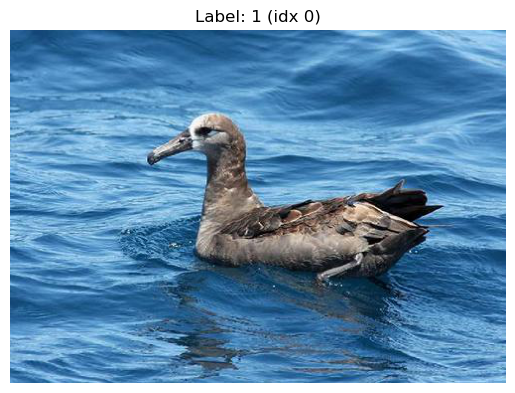

In [ ]:
# see one bird
row0 = train_df.iloc[0]
img = Image.open(row0["image_path"]).convert("RGB")
plt.imshow(img)
plt.title(f"Label: {row0['label']} (idx {row0['label_idx']})")
plt.axis("off")
plt.show()

In [ ]:
# train test split
train_df_split, val_df_split = train_test_split(train_df, test_size=0.2, stratify=train_df["label_idx"], random_state=42)

print("Training images:", len(train_df_split))
print("Validation images:", len(val_df_split))

Training images: 3140
Validation images: 786


Tensor shape: torch.Size([3, 224, 224])


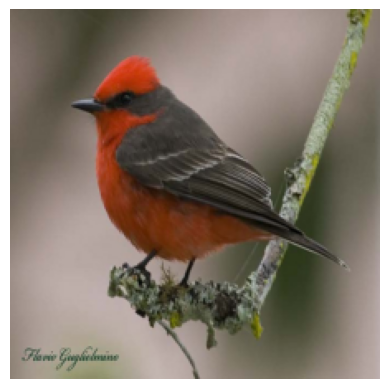

In [ ]:
def transform_image(image_path):
    """
    Opens an image and applies a simple transform.
    """
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()])

    img = Image.open(image_path).convert("RGB")
    tensor_img = transform(img)
    return tensor_img

sample_path = train_df_split.iloc[0]["image_path"]
tensor_img = transform_image(sample_path)

print("Tensor shape:", tensor_img.shape)

plt.imshow(tensor_img.permute(1,2,0))
plt.axis("off")
plt.show()